In [1]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn  (from sklearn.cluster import KMeans)
from sklearn.cluster import KMeans

In [2]:
# Load data
data = pd.read_csv('3.01.+Country+clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show(close=None, block=None)>

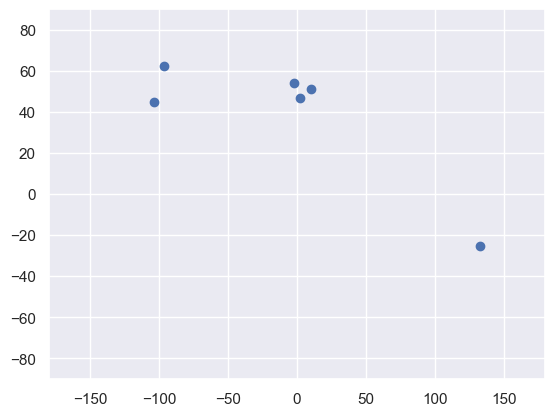

In [3]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [4]:
# Select the features
# iloc is a method used to 'slice' data
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position
# The first argument of identifies the rows we want to keep
# The second - the columns
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
#clustering 
# This is the part that deals with the actual clustering"
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(4)

In [6]:
# K-mean regression
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
# Clustering results
# Create a variable which will contain the predicted clusters for each observation\n",

identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 3, 2, 2, 2, 1])

In [8]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation\
data_with_clusters ['clusters'] = identified_clusters
data_with_clusters 
# the first five countries are in cluster zero

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,3
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(close=None, block=None)>

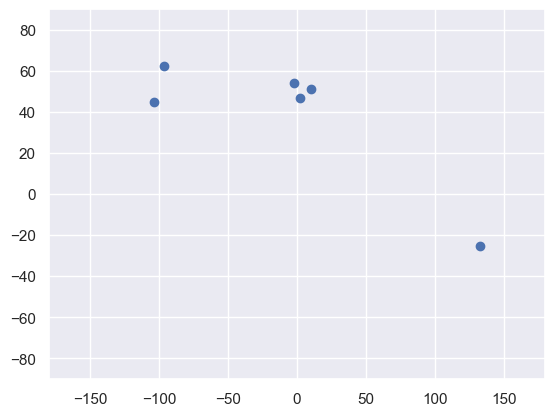

In [9]:
# Plot the data using the longitude (y-axis) and the latitude (x_axis) to resemble the world map
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

#### to modify the code above

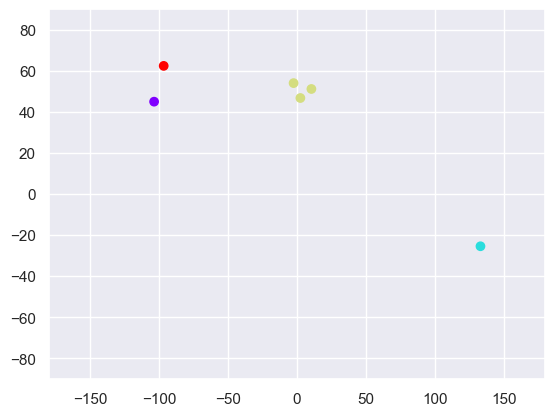

In [10]:

# Plot the data using the longitude (y-axis) and the latitude (x_axis) to resemble the world map
# c (color) is an argument which could be coded with a variabl
# 1. in matplotlib we can set the color to be determined by avariable (in our case cluster)
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map(sets the colour to rainbow). Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
  
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Clustering categorical data (in this case Language) vid 247

In [11]:
# Load data
data = pd.read_csv('3.01.+Country+clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


##### MAP THE DATA

In [12]:
# MAP THE DATA
data_maped = data.copy()
data_maped['Language']=data['Language'].map({'English':0,'French':1,'German':2})
data_maped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


#### select features

In [13]:
x=data_maped.iloc[:,1:4]
x
# we can use both numerical and categorical data in clustering by adjusting the .iloc [row, column)

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


#### Clustering

In [14]:
kmeans=KMeans(3)
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
identified_cluster=kmeans.fit_predict(x)
identified_cluster

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 2, 1])

In [16]:
data_with_cluster = data_maped.copy()
data_with_cluster['cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

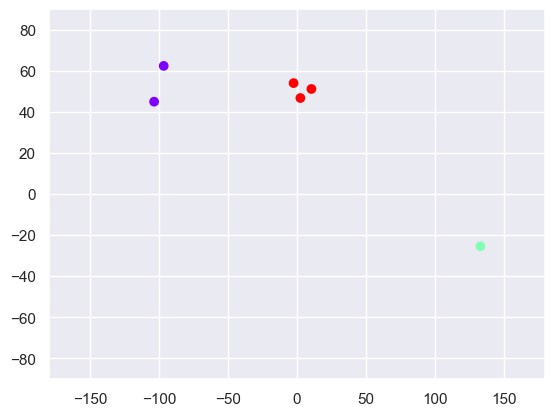

In [17]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'], c=data_with_cluster['cluster'], cmap= 'rainbow')
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show
# x=data_maped.iloc[:,1:4] the graph still turned out to be based simply on geographical location instead of language and location

### CLUSTER ANALYSIS EXERCISE 256

In [18]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn  (from sklearn.cluster import KMeans)
from sklearn.cluster import KMeans

In [19]:
# Load data
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


<function matplotlib.pyplot.show(close=None, block=None)>

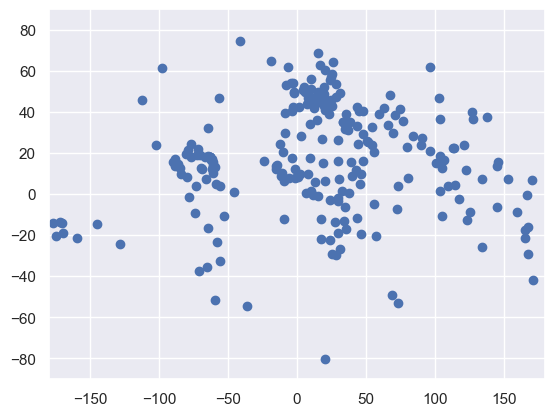

In [20]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [21]:
# select features
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [22]:
# Clustering
kmeans = KMeans(3)

In [23]:
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
# obtain the predicted clusters for each observation using the fit_predict method
identified_clusters = kmeans.fit_predict(x)
identified_clusters

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1])

In [25]:
data_clusters = data.copy()
data_clusters['clusters'] = identified_clusters
data_clusters 

,name,Longitude,Latitude,clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


<function matplotlib.pyplot.show(close=None, block=None)>

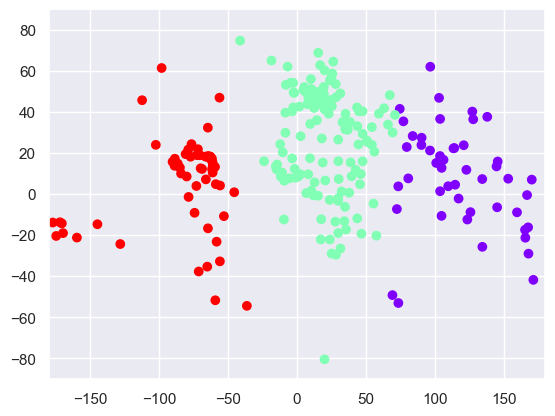

In [26]:
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c=data_clusters['clusters'], cmap= 'rainbow')
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

#### Clustering Categorical data Exercise video 258

In [27]:
# Load data
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [28]:
# MAKE A COPY OF DATAFRAME AND MAP DATA
data_maped=data.copy()
data_maped['continent'] = data_maped['continent'].map({'North America': 0,'Asia':1,'Africa':2,'Europe':3, 'Oceania':4,'Seven seas (open ocean)':5,
'Antarctica':6, 'South America':7})
data_maped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


In [29]:
# SElECT FEATURES
x = data_maped.iloc[:,3:4]
x

,continent
0,0
1,1
2,2
3,0
4,3
...,...
236,4
237,1
238,2
239,2


In [30]:
# CLUSTERING AND REGRESSION
kmeans= KMeans(5)
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [31]:
# Obtain predicted clusters
predicted_cluster=kmeans.fit_predict(x)
predicted_cluster

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 0, 4, 4, 4, 0, 3, 0, 1, 3, 1, 1, 0, 1, 4, 0, 2, 4, 2, 2,
       0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 3, 3, 0, 0, 0, 2, 2, 4, 3, 0, 2, 2,
       2, 2, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 4, 4, 2, 0, 4, 0, 2, 3, 2, 2,
       4, 4, 2, 4, 1, 3, 4, 4, 1, 2, 4, 0, 4, 2, 2, 2, 2, 2, 4, 0, 0, 0,
       1, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 0, 1, 4, 0, 0, 4, 0, 4, 0, 4, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 0, 2, 2, 0, 4, 0, 2, 4, 4, 4,
       0, 0, 2, 4, 4, 2, 1, 0, 1, 4, 2, 4, 0, 4, 0, 1, 2, 2, 0, 1, 2, 0,
       2, 1, 2, 1, 2, 0, 1, 4, 4, 0, 1, 1, 0, 0, 0, 1, 3, 0, 1, 1, 4, 0,
       0, 4, 3, 0, 1, 0, 4, 4, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 4, 2,
       2, 0, 4, 2, 3, 4, 4, 4, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 2, 4, 3, 0, 0, 4, 0, 3, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2])

In [32]:
data_with_clusters = data.copy()
data_with_clusters['clusters']=predicted_cluster
data_with_clusters

,name,Longitude,Latitude,continent,clusters
0,Aruba,-69.982677,12.520880,North America,0
1,Afghanistan,66.004734,33.835231,Asia,0
2,Angola,17.537368,-12.293361,Africa,2
3,Anguilla,-63.064989,18.223959,North America,0
4,Albania,20.049834,41.142450,Europe,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,1
237,Yemen,47.586762,15.909280,Asia,0
238,South Africa,25.083901,-29.000341,Africa,2
239,Zambia,27.774759,-13.458242,Africa,2


<function matplotlib.pyplot.show(close=None, block=None)>

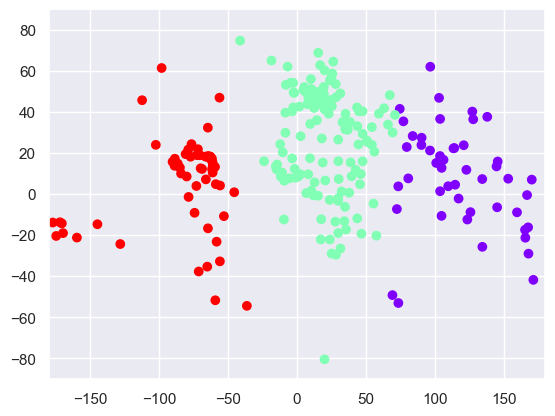

In [33]:
# Plot scatter plot with different colours to represent different clusters
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'], c=data_clusters['clusters'], cmap= 'rainbow')
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show
# NOTICE THAT THE CATEGORICAL CLUSTERING NUMBER FOLLOWS THE NUMBER OF CLUSTERS OF THE NUMERICAL VARIABLES # 

### VID 260 How to choose the number of clusters Exercise

In [34]:
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn  (from sklearn.cluster import KMeans)
from sklearn.cluster import KMeans

In [35]:
# Load data
data = pd.read_csv('Countries_exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


<function matplotlib.pyplot.show(close=None, block=None)>

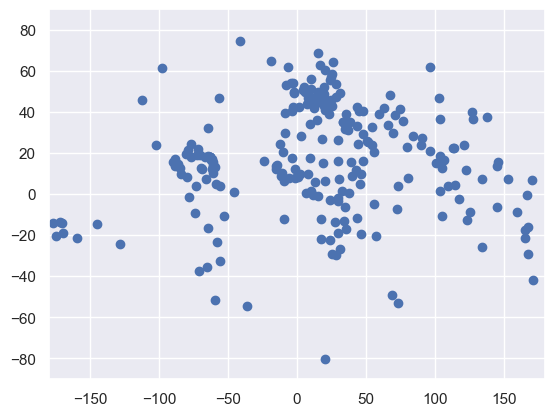

In [36]:
# plot longitude and latitude on scatter plot
plt.scatter(data_clusters['Longitude'], data_clusters['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [37]:
# feature selection
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [38]:
# # CLUSTERING AND REGRESSION
kmeans= KMeans(3)
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [39]:
# Clustering result
identified_cluster = kmeans.fit_predict(x)
identified_clusters

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2,
       0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1])

In [40]:
table_clustered=data.copy()
table_clustered['clusters']=identified_clusters
table_clustered

,name,Longitude,Latitude,clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,2
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


<function matplotlib.pyplot.show(close=None, block=None)>

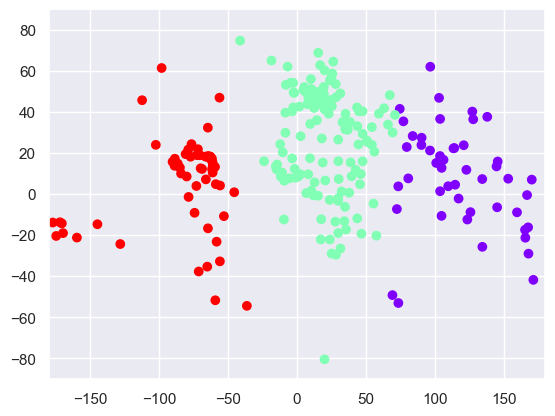

In [41]:
# Plot scatter plot with different colours to represent different clusters
plt.scatter(table_clustered['Longitude'],table_clustered['Latitude'], c=table_clustered['clusters'], cmap= 'rainbow')
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [42]:
# TO GET WCSS
kmeans.inertia_

325255.15398078033

In [43]:
# Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish)
# STEP ONE DECLARE AN EMPTY LIST
wcss=[]
# lets say we have 7 clusters
for i in range(1,7):
    kmeans = KMeans(i)
# fit the input data x using k-means
    kmeans.fit(x)
# calculate wcss for the iteration using the inertia method
    wcss_iter=kmeans.inertia_
# finally add wcss for the iteration to the wcss list using the append method
# LIST.APPEND(X): adds or appends a new item with value x to the end of the object (list,array etc)
    wcss.append(wcss_iter)




C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows wi

In [44]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256792.65319507528,
 195011.36281389277,
 154472.16590784278]

Text(0, 0.5, 'wcss')

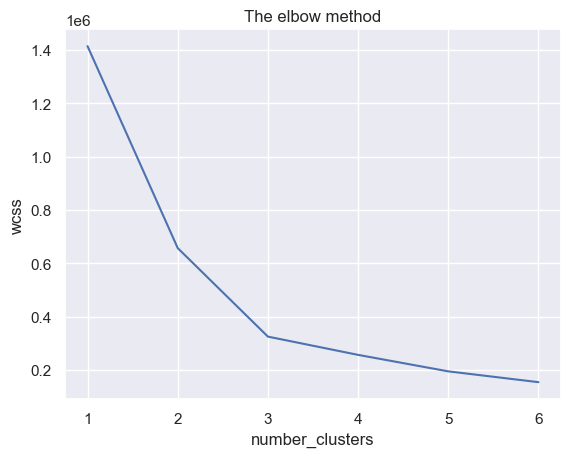

In [45]:
# THE ELBOW METHOD
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The elbow method')
plt.xlabel('number_clusters')
plt.ylabel('wcss')
# 3 IS THE OPTIMAL NUMBER OF CLUSTER

#### VID 267 MARKET SEGMENTATION EXAMPLE PART 1

In [46]:
# IMPORT RELEVANT LIBRARY
# IMPORT RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn  (from sklearn.cluster import KMeans)
from sklearn.cluster import KMeans

In [47]:
# LOAD DATA
data= pd.read_csv('3.12.+Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

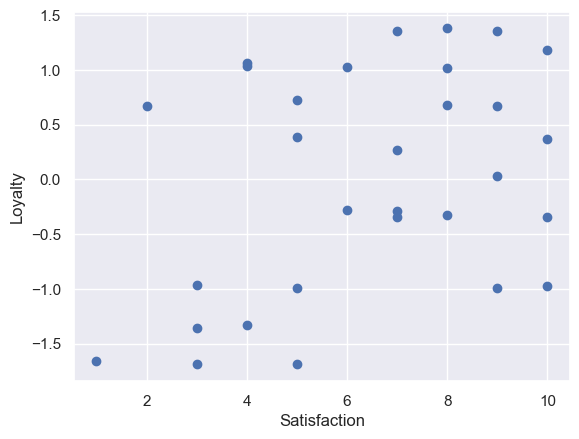

In [48]:
# PLOT THE DATA
# create a preliminary plot to see if you can spot something
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
# satisfaction (descrete variable) is rated from 1-10 with 10 being Extremely satisfied and 1-not satisfied at all
#  Loyalty is a continous variable(range: -2.5 to 2.5)

In [49]:
# FEATURE SELECTION
# Select both features by creating a copy of the data variable
x = data.copy()

In [50]:
# CLUSTERING
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [51]:
# CLUSTERING RESULT
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

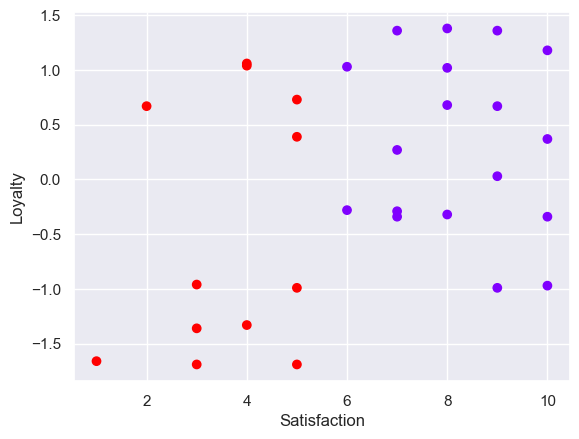

In [52]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# THE BELOW MIGHT SEEM GOOD BUT MOST PROBABLY THE ALGORITHM ONLY CONSIDERED SATISFACTION AS A FEATURE. THIS IS BC ITS WEIHGT IS HIGH 
# (BC IT HAS NOT BEEN STANDARDISED) AND K-MEANS MORE OR LESS DISREGARDED LOYALTY AS A FEATURE

# WHENEVER YOU CLUSTER ON THE BASES OF A SINGLE FEATURE THE RESULT WILL LOOK LIKE IT WAS CUT OFF BY A VERTICAL LINE AND ITS ONE OF THE WAYS TO SPOT 
# IF SOMETHING FISHY IS GOING ON

# BUT IT SEEMS BOTH FEATURES ARE BOTH SIGNIFICANT FOR MARKET SEGMENTATION SO WE STDIZE SATISFACTION 

In [53]:
# LETS STANDIZE AND check the new result
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
np.set_printoptions(formatter=None)
x_scaled = preprocessing.scale(x)
x_scaled

# This is a method to change the formatting of np arrays so they are so legible
# np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, use - np.set_printoptions(formatter=None)
# sklearn.preprocessing.scale(x)
# SCALE IS A METHOD WHICH SCALES EACH VARIABLE SEPERATELY IE EACH COLUMN WILL BE STADIZED WITH RESPECT TO ITSELF

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [54]:
# TAKE ADVANTAGE OF THE ELBOW METHOD
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows wi

[59.999999999999986,
 29.818973034723143,
 19.18756411022128,
 15.505382770792547,
 8.984892079013724,
 6.890345190334893,
 5.561431236503923,
 5.221688329609262,
 4.457491307021945]

Text(0, 0.5, 'wcss')

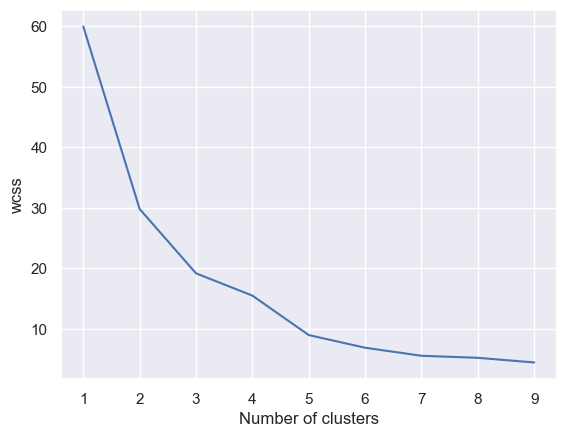

In [55]:
# CHECKING THE RESULTS

# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### VID 268 MKT SEGMENTATION WITH CA PART2

In [56]:
# EXAMINING THE ELBOW
# EXPLORE CLUSTERING SOLUTIONS AND SELECT THE NUMBER OF CLUSTERS

kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

# THE DF. CONTAINS THE ORIGINAL VALUES BUT THE PREDICTED CLAUSTERS ARE BASED ON THE SOLUTION USING THE STDIZED DATA

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,3
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,3
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,1
9,8,0.68,1


#### note that in unsupervised ml the algo will do the trick but data sc. interprete the result, naming ur cluster is very important

Text(0, 0.5, 'Loyalty')

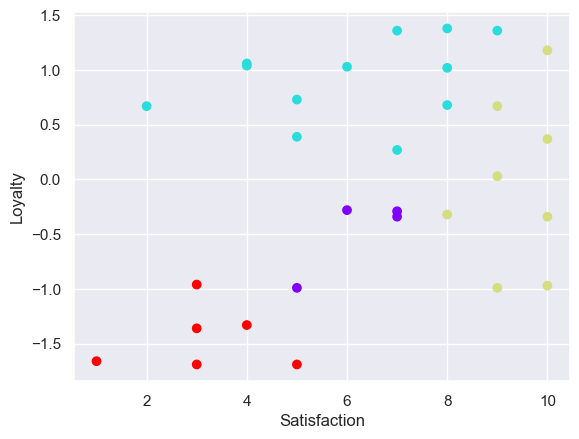

In [57]:
# PLOT THE DATA WITHOUT STANDARDIZED SATISFACTION AXIS
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'], cmap= 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# keeping the original x-axis we get the intuition for HOW SATISFIED WHERE THE CUSTOMERS
# comparing with the first plot u observe that both dimensions where taken into account
# LETS WORK WITH 4 OR 5 CLUSTERS

#### getting the dataframe with stdized axis for both loyalty and Satisfaction
#### but we make use of the unstdized satisfaction in the CA bc the stdized is decieving

In [58]:
# GET DF WITH STDIZED SATISFACTION AXIS AND PLOT THE SCATTER PLOT
#predicted_clusters=kmeans_new.fit_predict(x_scaled)
#stdized_value = pd.DataFrame(x_scaled, columns=data.columns)
#clusters_scaled = x_scaled.copy()
#stdized_value['clauster']=predicted_clusters
#stdized_value.head()

In [59]:
# PLOT THE DATA WITH STANDARDIZED SATISFACTION AXIS
#plt.scatter(stdized_value['Satisfaction'],stdized_value['Loyalty'],c=stdized_value['clauster'], cmap= 'rainbow')
#plt.xlabel('stdized Satisfaction')
#plt.ylabel('Loyalty')
#plt.xlim(-2.0,2.0)


# VID 270 exercise species segmentation (IRIS DATASET )

In [60]:
# IMPORT RELEVANT LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [61]:
# LOAD DATA
data = pd.read_csv('iris_dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


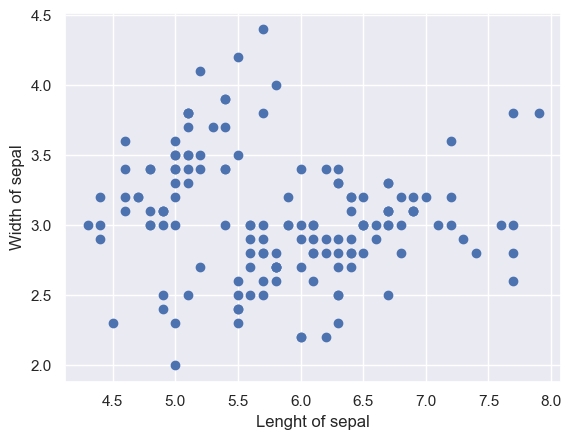

In [62]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [63]:
# FEATURE SELECTION
x=data.iloc[:,0:2] # or x=data.iloc[:,:2]
x.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [64]:
# Clustering (unscaled data)
# create a variable which will contain the data for the clustering
x = data.copy()
# k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [65]:
# create a copy of data, so we can see the clusters next to the original data\n",
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)
clusters

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


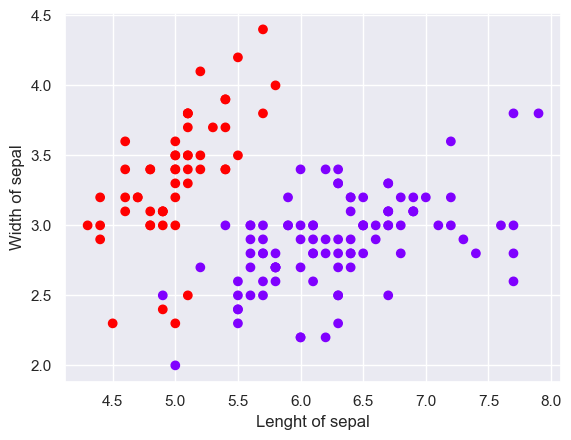

In [66]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [67]:
# STDIZE THE VARIABLE
# Import and use the scale method from sklearn to standardize the data
from sklearn import preprocessing
# scale the data for better results
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [68]:
# Clustering (scaled data)
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [69]:
# Create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
clusters_scaled

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


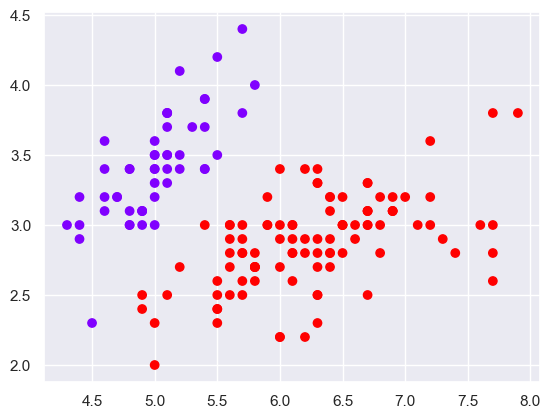

In [70]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

### the two solutions are identical. That is because the original features have very similar scales to start with

In [71]:
# 
kmeans.inertia_

152.36870647733906

In [72]:
# Elbow Method
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows wi

[600.0,
 223.73200573676345,
 141.1541781338865,
 122.76777301519581,
 106.14902225339068,
 97.8916032852805,
 70.93964372756811,
 64.141978144221,
 56.497071728079646]

Text(0, 0.5, 'Within-cluster Sum of Squares')

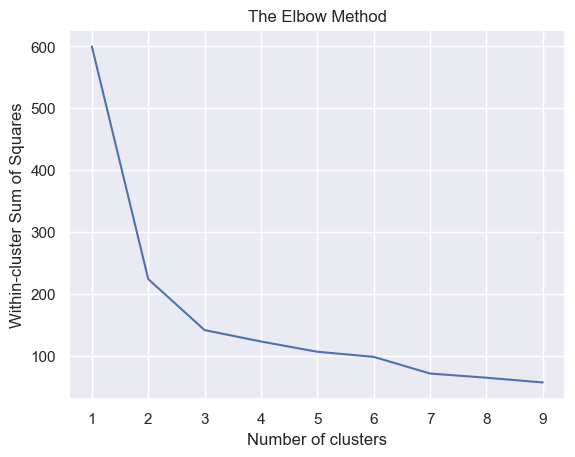

In [73]:
# The elbow method
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

##It seems like 2,3 or 5 cluster solutions are the best

## VID 271 exercise species segmentation part2 (IRIS DATASET)

In [74]:
# Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. 
# Based on the Elbow Curve, 2, 3 or 5 seem the most likely
# Start by seperating the standardized data into 2 clusters
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [75]:
# Construct a scatter plot of the original data using the standartized clusters
# Remember that we are plotting the non-standardized values of the sepal length and width
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)
clusters_3

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


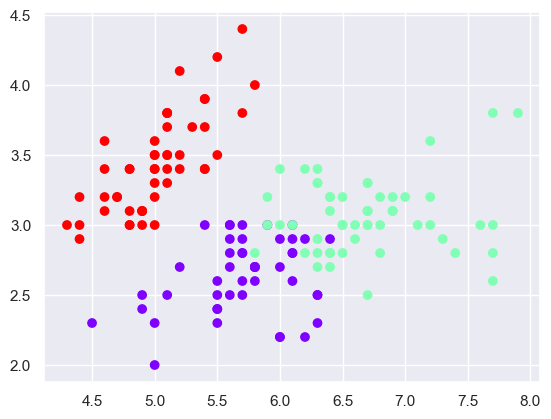

In [76]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

#### FOR 4 CLAUSTER

In [77]:
# Start by seperating the standardized data into 2 clusters
kmeans_4 = KMeans(4)
kmeans_4.fit(x_scaled)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [78]:
# Construct a scatter plot of the original data using the standartized clusters
# Remember that we are plotting the non-standardized values of the sepal length and width
clusters_4 = x.copy()
clusters_4['cluster_pred']=kmeans_4.fit_predict(x_scaled)
clusters_4

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


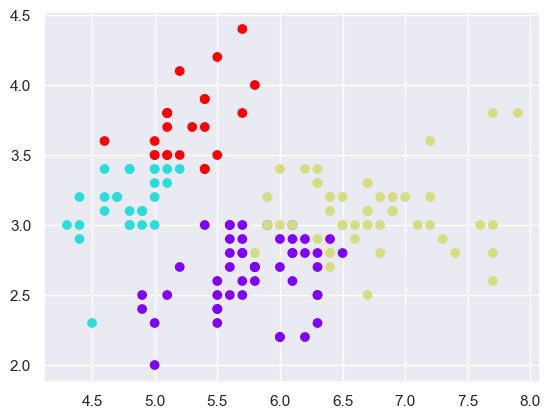

In [79]:
plt.scatter(clusters_4['sepal_length'], clusters_4['sepal_width'], c= clusters_4['cluster_pred'], cmap = 'rainbow')

#### FOR 5 CLAUSTER

In [80]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [81]:
# Construct a scatter plot of the original data using the standartized clusters
# Remember that we are plotting the non-standardized values of the sepal length and width
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)
clusters_5

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


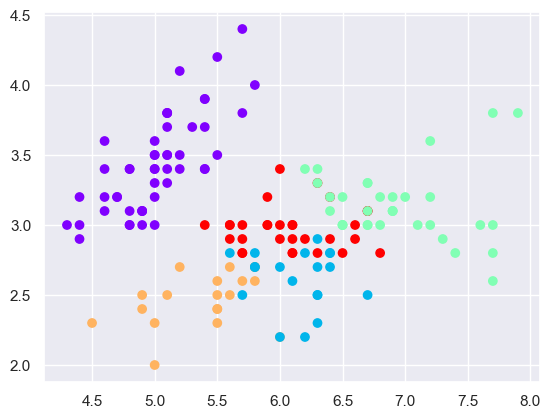

In [82]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5['cluster_pred'], cmap = 'rainbow')

## the original iris dataset with 3 species

In [83]:
# The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). 
# Therefore, clustering cannot be trusted at all times. 
# Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).


In [84]:
# LOAD REAL IRIS DATASET
real_data = pd.read_csv('iris_with_answers.csv')
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [85]:
real_data['species'].unique()  
# or .drop_duplicates()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [86]:
# CREATE A COPY OF DF AND MAP THE SPECIES
real_data = real_data.copy()
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


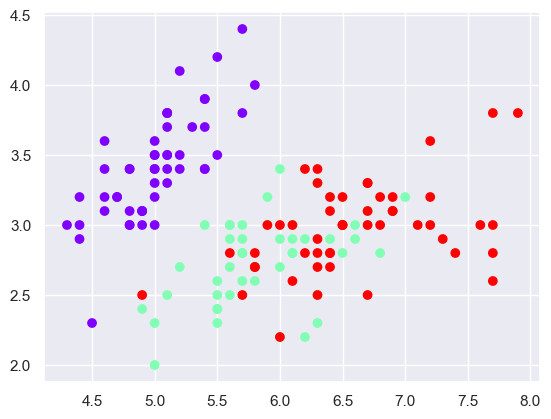

In [87]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
# Looking at the graph below it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

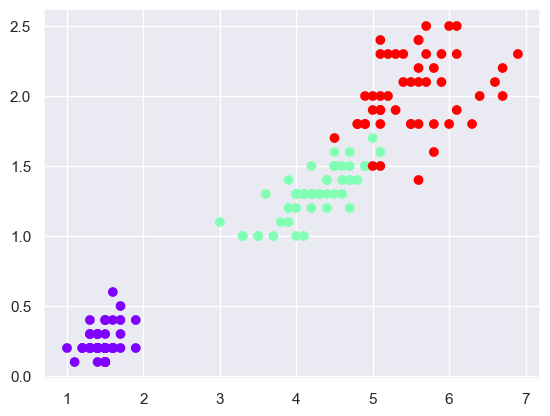

In [88]:
# plot scatter plot for petals
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
# Examining the other scatter plot (petal length vs petal width)
# we see that in fact the features which actually make the species different are petals and NOT sepals

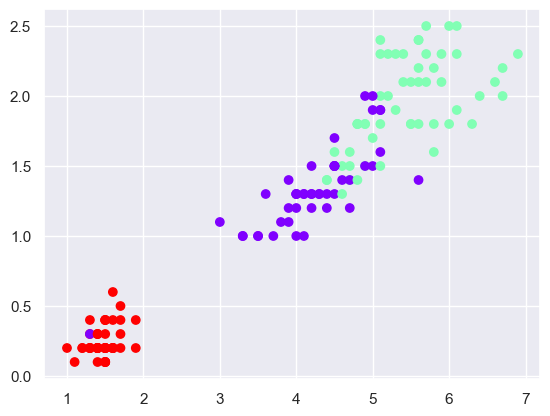

In [89]:
## OUR CLUSTERING SOLUTION DATA
# plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

### FURTHER CLEARIFICATION

In [90]:
# if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.
# This shows us that:
# the Eblow method is imperfect (we might have opted for 2 or even 4)
# k-means is very useful in moments where we already know the number of clusters - in this case: 3 
# biology cannot be always quantified (or better), quantified with k-means! Other methods are much better at that 

###Finally, you can try to classify them (instead of cluster them, now that you have all the data) ###

## SECTION 39: ASM OTHER TYPES OF CLUSTERING 
### VID 274 HEATMAPS

In [92]:
# IMPORT RELEVANT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
# We don't need matplotlib this time

In [93]:
# Load the data

# Load the standardized data
# index_col is an argument we can set to one of the columns, this will cause one of the Series to become the index
# pd.read_csv(*.csv,index_col): index_col is an arguement which specify a given column from the CSV as index of the dataframe
data = pd.read_csv('Country+clusters+standardized.csv', index_col='Country')
data

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2
Australia,-2.003422,1.648581,0


In [95]:
# Create a new data frame for the inputs, so we can clean it
x_scaled = data.copy()
# Drop the variables that are unnecessary for this solution
x_scaled = x_scaled.drop(['Language'],axis=1)
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


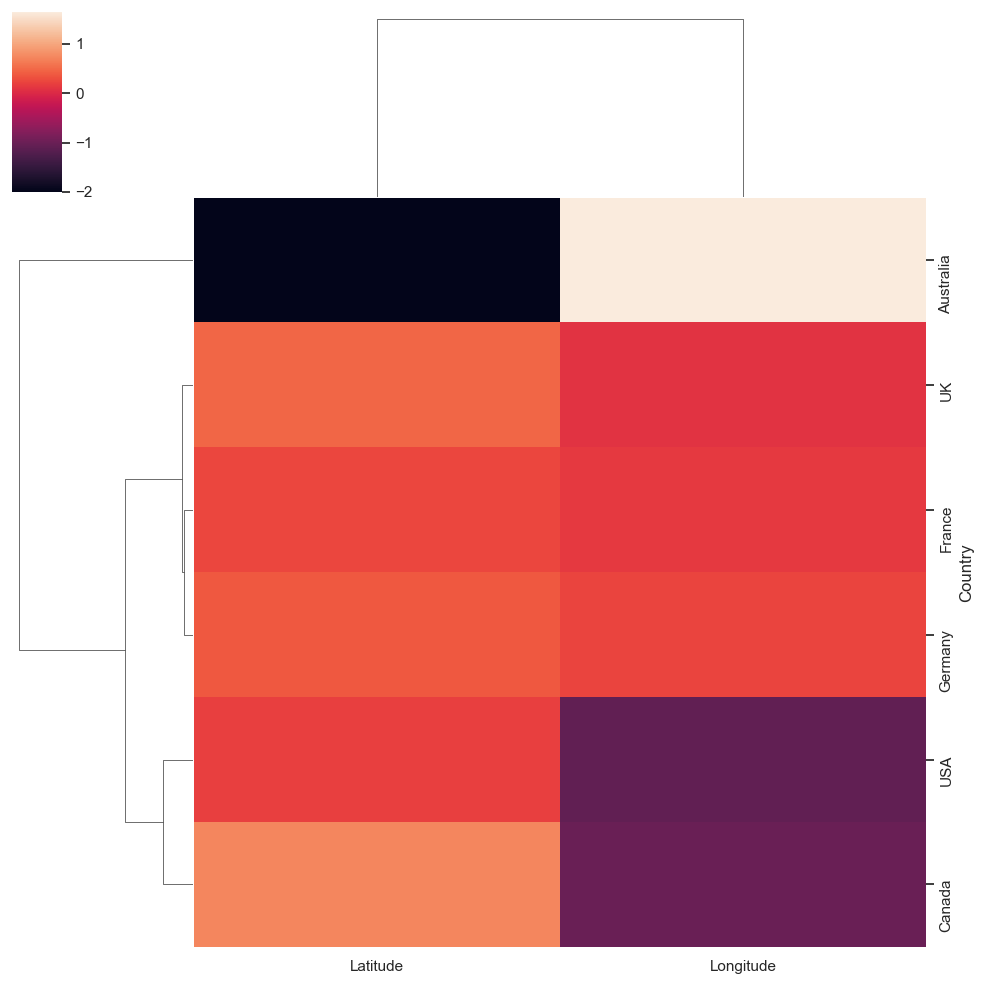

In [96]:
# PLOT THE DATA
# Using the Seaborn method 'clustermap' we can get a heatmap and dendrograms for both the observations and the features
# The cmap 'mako' is the coolest if you ask me\n",
# sns.clustermap(x_scaled, cmap='mako')
sns.clustermap(x_scaled)

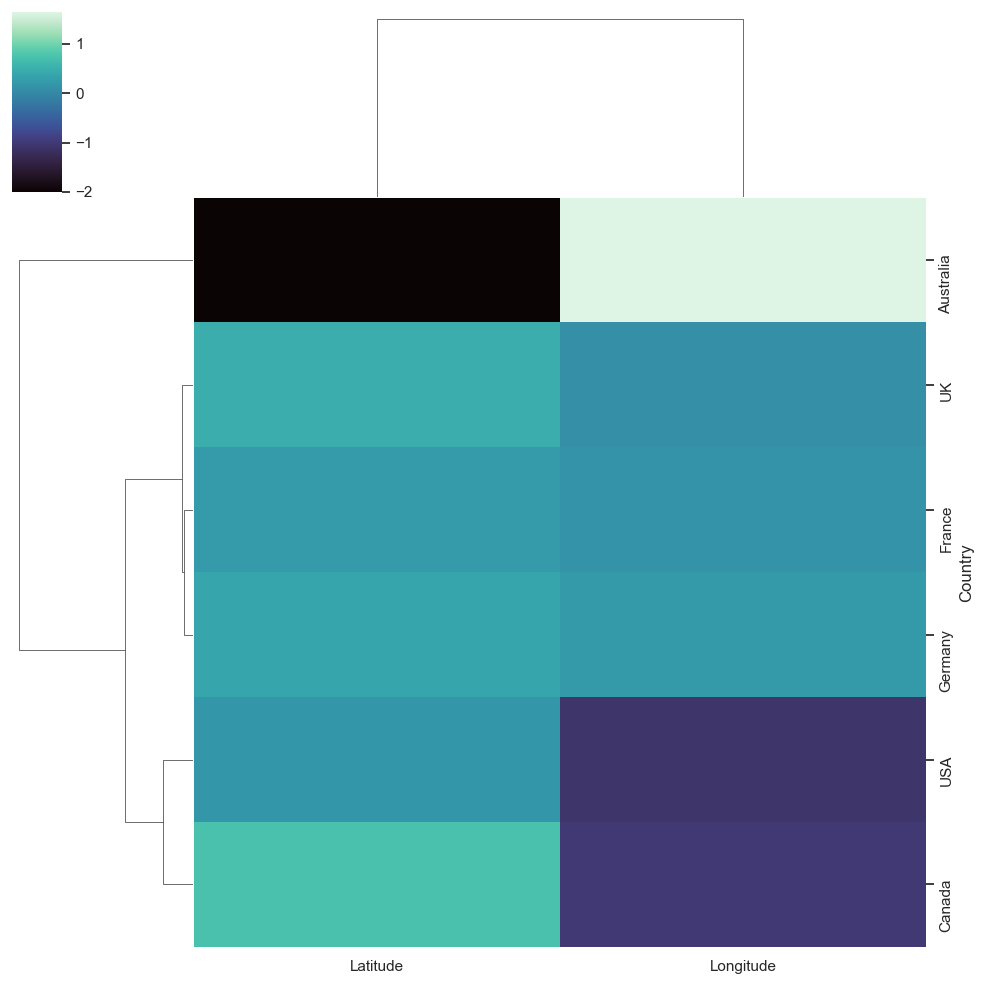

In [97]:
# The cmap 'mako' is the coolest if you ask me\n",
sns.clustermap(x_scaled, cmap='mako')
# ON THE LEFT IS A DENDROGRAM
# THE RECTANGLE LIKE SHAPE AT THE TOP IS ANOTHER DENDROGRAM UNITING THE TWO FEATURES; In same way we can reduce the dimensionality of the problem by
# combining the features themselves
